# **Questão 2** - Avner José Guimaraẽs Ribeiro

## **Instruções**



*   Verifique as respostas antes de enviar, veja se elas fazem sentido!
*   Lembre-se de salvar frequentemente!
*   Não envie apenas o notebook, envie a pasta inteira com as imagens!



# **Formulário**

## **Importações**
```
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

## **Códigos**
```
# Manipulação de imagens
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')

# Histograma
plt.bar(range(256), histogram_r, color='red')
plt.bar(range(256), histogram_g, color='green')
plt.bar(range(256), histogram_b, color='blue')

# Detecção de bordas
abs_tg_eixo = np.abs(np.diff(img, axis=eixo, append=0))
```

## **Fórmulas**

### **Grayscale**

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$


### **Cor**

$$\begin{bmatrix}
    R \\ G \\ B
\end{bmatrix} = \begin{bmatrix}
    255 \\ 255 \\ 255
\end{bmatrix} - \begin{bmatrix}
    C \\ M \\ Y
\end{bmatrix}$$



**a)** Abra os arquivos **dog.jpg** e **oculos.jpg** presentes na pasta e mostre na tela. Verifique a presença do canal alfa e faça o devido tratamento caso ele exista.

(200, 200, 3)
(400, 400, 3)


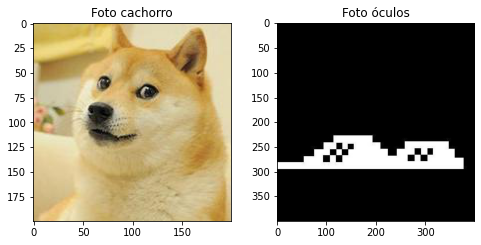

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#Importanto as imagens
img_dog = np.array(Image.open('dog.jpg')) 
img_glasses = np.array(Image.open('oculos.jpg'))

#Mostrando as dimensões das imagems
#Obs: Como as duas imagens tem o formato (x,y,3) significa que não possuem canal alfa, não é necessário
#fazer tratamento em relação à isso
print(img_dog.shape)  
print(img_glasses.shape)


#Mostrando as imagens na tela
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Foto cachorro')
plt.imshow(img_dog)
plt.subplot(2,2,2)
plt.title('Foto óculos')
plt.imshow(img_glasses)

**b)** Realize a mudança de escala na imagem **dog.jpg** a fim de deixá-la com as mesmas dimensões da imagem **oculos.jpg**. Exiba o resultado.

**Obs: utilize o Nearest Neighbor ou Interpolação Bilinear para resolver o problema de ausência de pixels.**

(200, 200, 3)
(400, 400, 3)


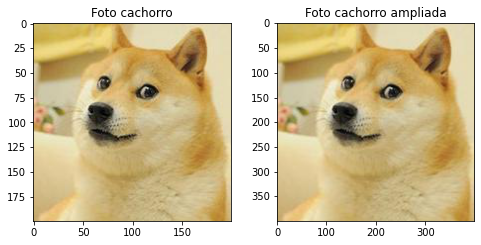

In [28]:
#Como a imagem "dog.jpg" tem metade do tamanho da do óculos, é preciso fazer um escala de 2x

(l,c,p) = img_dog.shape
(sx,sy) = (2,2) #Valores para a escala
(ls,cs) = (l*sx,c*sy)

sc_dog = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

#Aplica o nearest neighbor
for i in range(ls):
    for j in range(cs):
        new_x= int(np.floor(i * (l / ls)))
        new_y = int(np.floor(j * (c / cs)))
        
        sc_dog[i, j] = img_dog[new_x, new_y]
        
print(img_dog.shape)
print(sc_dog.shape)        
#Mostrando as imagens na tela
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Foto cachorro')
plt.imshow(img_dog)
plt.subplot(2,2,2)
plt.title('Foto cachorro ampliada')
plt.imshow(sc_dog)

**c)** Faça espelhamento da imagem **oculos.jpg** nos eixos **x e y**. Exiba o resultado.

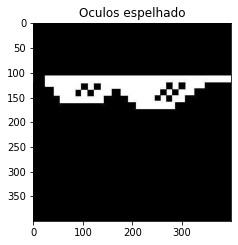

In [31]:
rf_glasses = np.zeros(shape=img_glasses.shape, dtype=np.uint8)
(l,c,p) = img_glasses.shape

for i in range(l):
    for j in range(c):
        new_x = -i #Espelha o valor de x
        new_y = -j #Espelha o valor de y
        rf_glasses[new_x, new_y] = img_glasses[i, j]

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Oculos espelhado')
plt.imshow(rf_glasses)

**d)** Realize a operação lógica NOT na imagem daquestão anterior. Exiba o resultado.

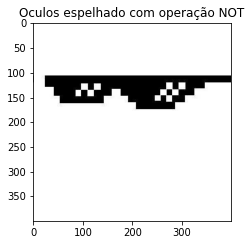

In [33]:
rf_glasses_not = np.bitwise_not(rf_glasses) #Aplica a operação NOT

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Oculos espelhado com operação NOT')
plt.imshow(rf_glasses_not)

**e)** Realize a operação lógica E entre as imagens das questões **B** e **D**. Exiba o resultado.

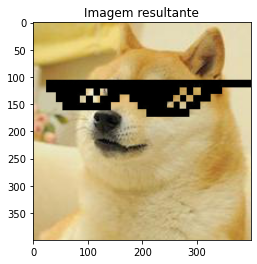

In [36]:
img_and = np.bitwise_and(sc_dog,rf_glasses_not) #Aplica a operação AND

plt.title('Imagem resultante')
plt.imshow(img_and)

**f)** Realize o cisalhamento na imagem da questão anterior. Utilize cx = 0,3 e cy = 0,2.

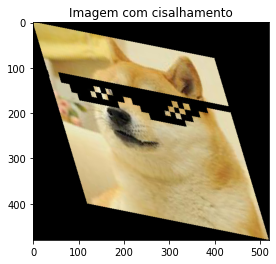

In [39]:
(l,c,p) = img_and.shape
(cx,cy) = (0.3,0.2)
sh_img = np.zeros(shape=(int(l*(1+cy)),int(c*(1+cx)),p),dtype=np.uint8)

for i in range(l):
    for j in range(c):
        new_x = int(i + j*cy)
        new_y = int(j + i*cx) 
        sh_img[new_x,new_y] = img_and[i,j]
        
plt.title('Imagem com cisalhamento')        
plt.imshow(sh_img)        

**g)** Converta a imagem da questão anterior para preto e branco. Exiba o resultado.

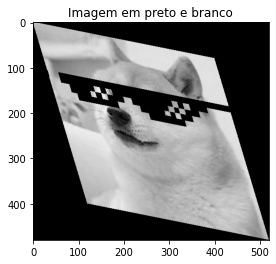

In [43]:
(l,c,p) = sh_img.shape
img_grey = np.zeros(shape=(l,c),dtype=np.uint8)

#Aplica o método lumiosity para transformar a imagem em preto e branco
for i in range(l): 
    for j in range(c): 
        r = float(sh_img[i,j,0])
        g = float(sh_img[i,j,1])
        b = float(sh_img[i,j,2])

        rw = 0.2126
        gw = 0.7152
        bw = 0.0722

        grey = r*rw + g*gw + b*bw
        img_grey[i,j] = grey

plt.title('Imagem em preto e branco')
plt.imshow(img_grey,cmap="gray")        

**h)** Realize a detecção de bordas da imagem anterior. Utilize o método da convolução e o kernel de Sobel. Exiba o resultado.

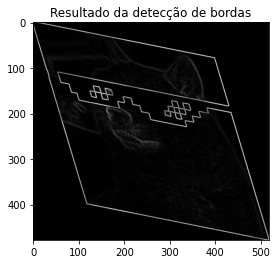

In [48]:
def conv(image, kernel):
    m, n = kernel.shape
    
    assert m == n, "Kernel deve ser uma matriz quadrada."
    l, c = image.shape
    
    new_l = l - m + 1
    new_c = c - n + 1
    new_image = np.zeros(shape=(new_l, new_c))
    for i in range(new_l):
        for j in range(new_c):
            new_image[i, j] = np.sum(image[i:i + n, j:j + m] * kernel)
    
    return new_image

def sobel(img):
    kernel_x = np.array([[1, 0,-1], [ 2, 0, -2],[1,0,-1]], dtype=np.float64)
    kernel_y = np.array([[1, 2, 1], [0, 0, 0],[-1,-2,-1]], dtype=np.float64)
    
    conv_x = conv(img, kernel_x)
    conv_y = conv(img, kernel_y)
    
    gradient = np.hypot(conv_x, conv_y)
    
    return gradient

plt.title('Resultado da detecção de bordas')
plt.imshow(sobel(img_grey/255),cmap="gray")
